# Importing Libraries

Importing libraries required for CNN and Transfer Learning

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import keras #this is used to build network
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Downlaod and prepare Data

Downloading/Loading the Fasion_mnist dataset from keras and splitting it into Train and test and storing in X and Y variables.

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Printing the shape of train and Test datasets.

In [3]:
X_train.shape, Y_train.shape ,X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Printing the first elements of  X_train which is in 2D numpy array 28x28 pixels.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

printing the first elements of Y_train

In [5]:
Y_train[0]

9

# Labelling images

Creating the list and Labelling the names for the images and storing in class_lables variable.

In [6]:
Lables = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","AnkleBoot"]
Lables

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'AnkleBoot']

Plotting the first image of X_train

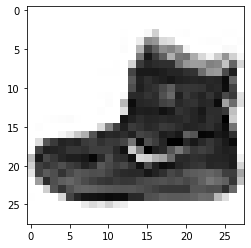

In [7]:
plt.imshow(X_train[0], cmap="Greys")

Displaying the 25 images using for loop with the lables.

# Verify the dataset

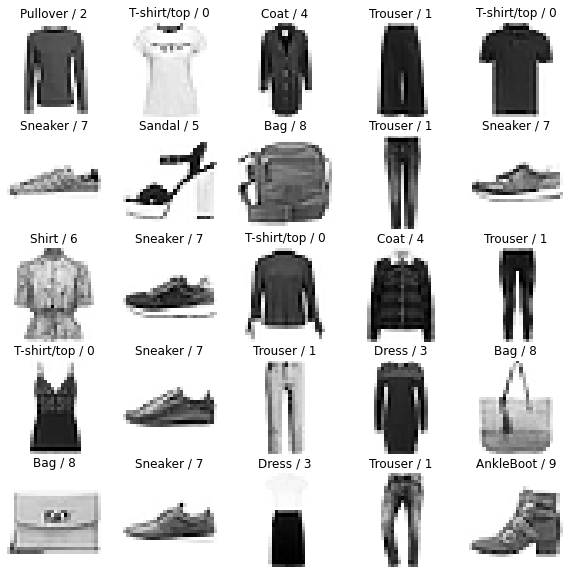

In [8]:
plt.figure(figsize=(10,10))
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(Lables[Y_train[i]], Y_train[i]))

Checking the Dimension of X_train.

In [9]:
X_train.ndim  # Here we have 3 dimenional image

3

We need 4 Dimensional image to given the input to Conv2D our model but we got 2D. So we are expanding the dimension of the image to 4 Dimensional.

In [10]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

Rechecking the dimension of the image.

In [11]:
X_train.ndim

4

# Scaling the dataset

We are scaling all the images to 0  to 1 by diving with 255 as the pixels are from 0-255. By doing this the computation will be easy and faster. This is basically min-max scaler.

In [12]:
X_train = X_train/255
X_test = X_test/255

# Splitting the dataset into training and testing

Splitting our dataset into training and testing. Here we have taken test size as 20%.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2020)

Checking the shape of the dataset after splitting it into training and testing.

In [14]:
X_train.shape, Y_train.shape, X_val.shape, y_val.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Data Augmentation

Data Augmentation : By using this method we can provide more number of images to the model by just re-shaping like verticalflip, horizontalflip etc. By this our model will become and robust and can able to provide better accuracy.

In [15]:
from IPython.core.display import Image
train_generator = ImageDataGenerator(
    rescale =1./255, #normalization of images
    rotation_range =40, #augementation of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode= 'nearest'
)
val_generator=ImageDataGenerator(rescale=1./255)
train_iterator = train_generator.flow(X_train, Y_train, batch_size=512, shuffle=True)
Val_iterator = val_generator.flow(X_test, Y_test, batch_size= 512, shuffle=False)

# Create the Convolutional base

In [16]:
cnn_model = keras.models.Sequential([
                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation ='relu', input_shape=[28,28,1]), 
                        # we used 32 filters, only 1 stride, padding is present, used relu layer, and the input siize is 28,28,1 which is Black and white image
                        tf.keras.layers.MaxPooling2D(pool_size=[2,2]), #used maxpooling to extract more and more clear information.
                        tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation ='relu'), #applying Convolution operation again
                        tf.keras.layers.MaxPooling2D(pool_size=[2,2]), 
                        tf.keras.layers.Flatten(), #Used  flatten to flatten the output from the maxpooling.
                        tf.keras.layers.Dense(units=128, activation='relu'), #Dense is used to identify the images based on the output from CNN.
                        tf.keras.layers.Dropout(0.25),
                        tf.keras.layers.Dense(units=256, activation='relu'),
                        tf.keras.layers.Dropout(0.25),
                        tf.keras.layers.Dense(units=128, activation='relu'),
                        tf.keras.layers.Dense(units=10, activation='softmax'),
                        ])

# Compile and Train the model

Here we have used adam optimizer as we have many number of outputs we used sparse_categorical_crossentropy. Batch size of 16,and verbose is 1.

In [17]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history=cnn_model.fit(X_train, Y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_val, y_val)) # we have got 93% of accuracy

Epoch 1/20
3000/3000 [==============================] - 54s 17ms/step - loss: 0.5607 - accuracy: 0.7915 - val_loss: 0.3845 - val_accuracy: 0.8634
Epoch 2/20
3000/3000 [==============================] - 44s 15ms/step - loss: 0.3629 - accuracy: 0.8679 - val_loss: 0.3269 - val_accuracy: 0.8770
Epoch 3/20
3000/3000 [==============================] - 41s 14ms/step - loss: 0.3146 - accuracy: 0.8849 - val_loss: 0.3071 - val_accuracy: 0.8857
Epoch 4/20
3000/3000 [==============================] - 42s 14ms/step - loss: 0.2882 - accuracy: 0.8950 - val_loss: 0.3125 - val_accuracy: 0.8879
Epoch 5/20
3000/3000 [==============================] - 41s 14ms/step - loss: 0.2692 - accuracy: 0.9013 - val_loss: 0.2870 - val_accuracy: 0.9003
Epoch 6/20
3000/3000 [==============================] - 42s 14ms/step - loss: 0.2501 - accuracy: 0.9080 - val_loss: 0.2962 - val_accuracy: 0.8967
Epoch 7/20
3000/3000 [==============================] - 43s 14ms/step - loss: 0.2360 - accuracy: 0.9135 - val_loss: 0.2739 -

In [18]:
Y_pred=cnn_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


# Evaluate the model

Checking the predicted and actula images are predicted correclty or not.

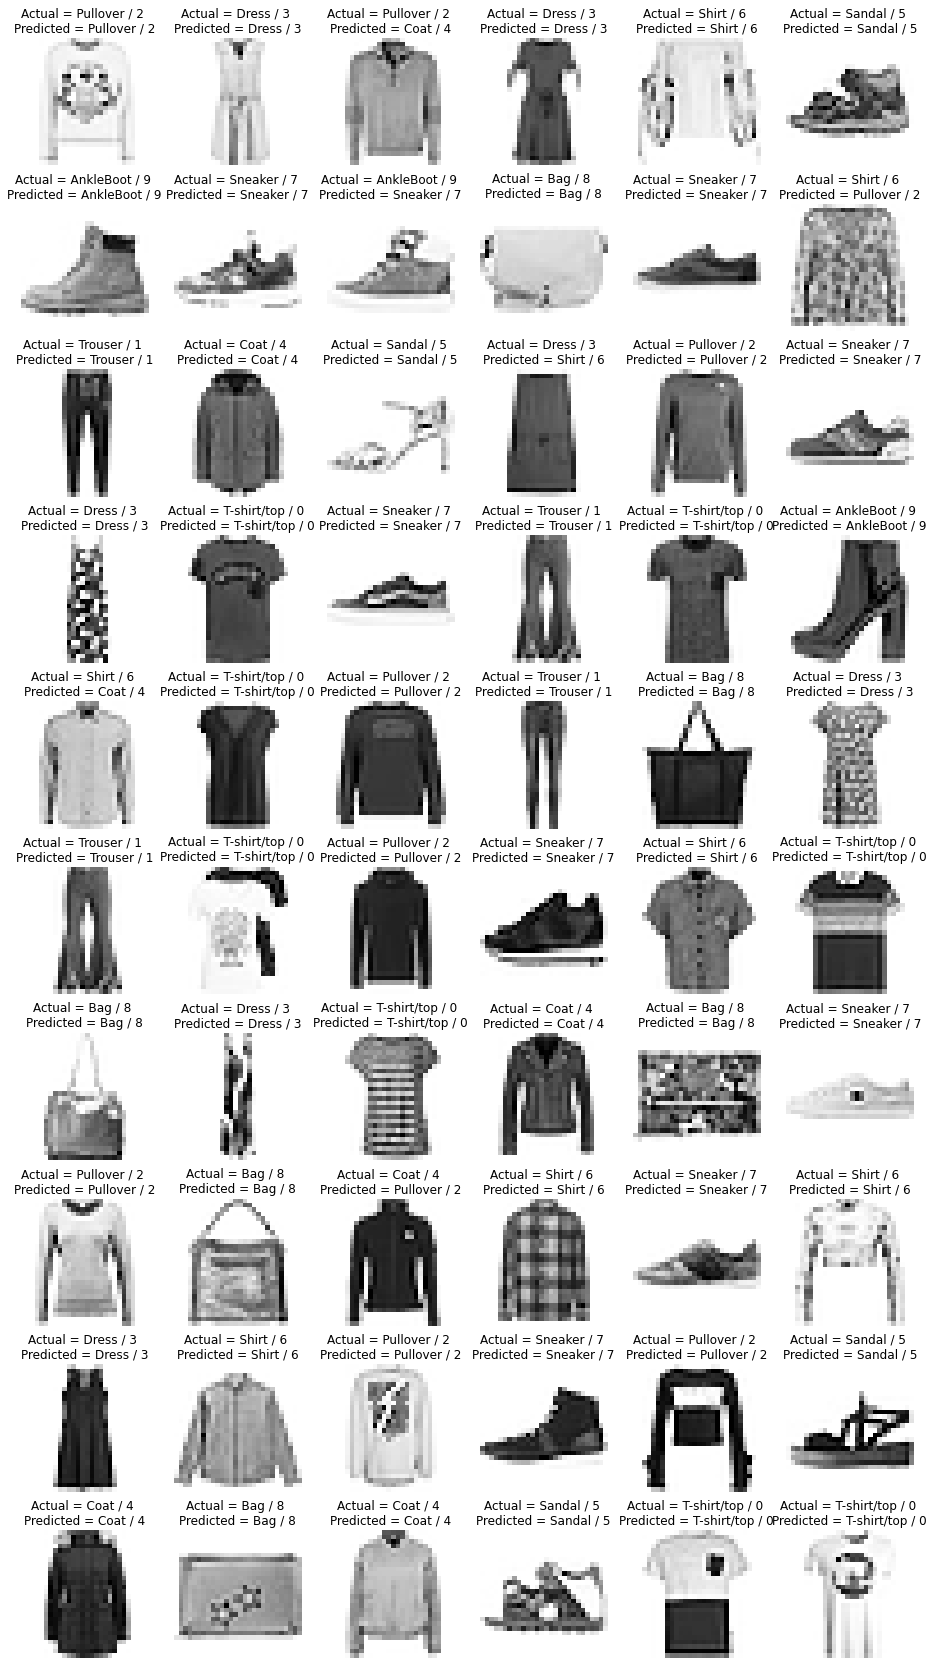

In [19]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(Lables[Y_test[i]], Y_test[i], Lables[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
  plt.axis('off')

Printing the confuion matrix from the predicted data and tested data.

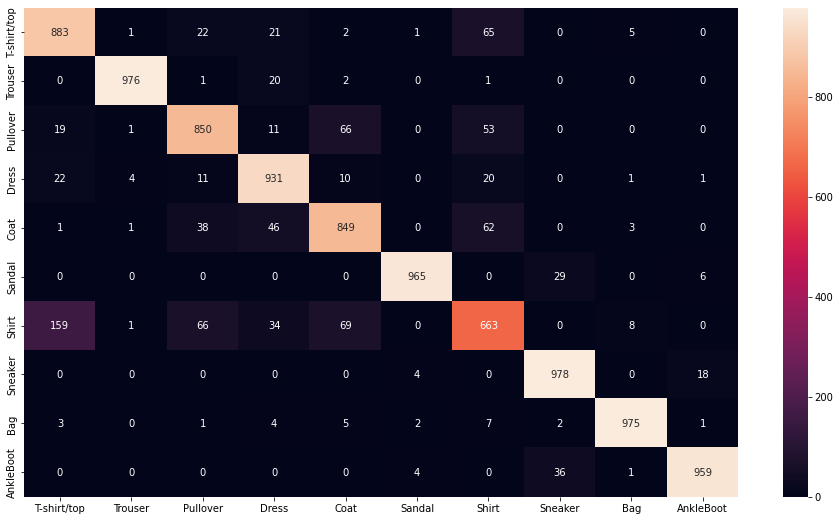

In [20]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
Y_pred_labels =[ np.argmax(label) for label in Y_pred ]
cm = confusion_matrix(Y_test, Y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d',xticklabels=Lables,  yticklabels=Lables)

Printing the classification_report

In [21]:
Y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Plotting the graph for accuracy and val_accuracay. As the graph shows there is a increase in the gap as we go beyind. So we can stop withe the iterations.

1500/1500 - 10s - loss: 0.1216 - accuracy: 0.9561 - 10s/epoch - 7ms/step


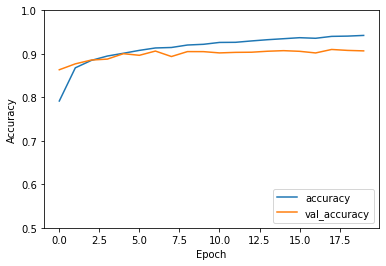

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc = cnn_model.evaluate(X_train, Y_train, verbose=2)

## Transfer learning


Loading the  fashion_mnist dataset

In [23]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

Checking the given input shape of the dataset

In [24]:
x_train.shape

(60000, 28, 28)

np_utils is used to convert the array of labeled data from 0 to 1

---



In [25]:
from keras.utils import np_utils

Creating empty pretrain lists for train(images) and test(labels), as well as transfer learning for train and test. The fashion mnist dataset is consisting of a training set of 60000 images and a test set of 10000 images. Consider less than 5 labels for training, as well as dividing the pretrain for train (images) and transfer learning for train by 255, which rescales the image from 0-255 to 0-1. Also consider less than 5 labels for testing, as well as dividing the pretrain for testing and transfer learning for testing by 255. And printing the weights, image size, image color, and shape of the pretrain for train and test, as well as transfer learning for train and test.

# Pre-Trained data and transer learning data

In [26]:
# creating empty lists for pretrained and transfer learning(tl) for training and testing 
pretrain_x_train=[]
pretrain_y_train=[]
pretrain_x_test=[]
pretrain_y_test=[]

tl_x_train=[]
tl_y_train=[]
tl_x_test=[]
tl_y_test=[]

p=60000

for i in range(p):
    if y_train[i]<5:
        pretrain_x_train.append(x_train[i]/255)
        pretrain_y_train.append(y_train[i])
    else:
        tl_x_train.append(x_train[i]/255)
        tl_y_train.append(y_train[i])

q= 10000

for i in range(q):
    if y_test[i]<5:
        pretrain_x_test.append(x_test[i]/255)
        pretrain_y_test.append(y_test[i])
    else:
        tl_x_test.append(x_test[i]/255)
        tl_y_test.append(y_test[i])
                         
pretrain_x_train=np.asarray(pretrain_x_train).reshape(-1,28,28,1)
pretrain_x_test=np.asarray(pretrain_x_test).reshape(-1,28,28,1)
pretrain_y_train=np_utils.to_categorical(np.asarray(pretrain_y_train))
pretrain_y_test=np_utils.to_categorical(np.asarray(pretrain_y_test))

tl_x_train=np.asarray(tl_x_train).reshape(-1,28,28,1)
tl_x_test = np.asarray(tl_x_test).reshape(-1,28,28,1)
tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))
tl_y_test = np_utils.to_categorical(np.asarray(tl_y_test))

                         
print(pretrain_x_train.shape,pretrain_y_train.shape)
print(pretrain_x_test.shape,pretrain_y_test.shape)

print(tl_x_train.shape,tl_y_train.shape)
print(tl_x_test.shape,tl_y_test.shape)

(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


# Creating a sequential model

View all the layers of the network using model.summary().In this all the parameters are trained

In [27]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Activation,MaxPool2D,Dropout,Flatten

In [28]:
model = Sequential()

model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))

model.add(Conv2D(16,(5,5),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                      

# Compile and train the model

In [29]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
model.fit(pretrain_x_train,pretrain_y_train,
         validation_data=(pretrain_x_test,pretrain_y_test),
         epochs=20,
         batch_size=100,
         verbose=2,
         shuffle=True)

Epoch 1/20
300/300 - 62s - loss: 0.5400 - accuracy: 0.7885 - val_loss: 0.3469 - val_accuracy: 0.8754 - 62s/epoch - 205ms/step
Epoch 2/20
300/300 - 61s - loss: 0.3313 - accuracy: 0.8785 - val_loss: 0.2734 - val_accuracy: 0.9002 - 61s/epoch - 203ms/step
Epoch 3/20
300/300 - 61s - loss: 0.2748 - accuracy: 0.9003 - val_loss: 0.2419 - val_accuracy: 0.9146 - 61s/epoch - 203ms/step
Epoch 4/20
300/300 - 61s - loss: 0.2489 - accuracy: 0.9096 - val_loss: 0.2226 - val_accuracy: 0.9236 - 61s/epoch - 203ms/step
Epoch 5/20
300/300 - 61s - loss: 0.2287 - accuracy: 0.9190 - val_loss: 0.2091 - val_accuracy: 0.9280 - 61s/epoch - 203ms/step
Epoch 6/20
300/300 - 61s - loss: 0.2168 - accuracy: 0.9231 - val_loss: 0.2055 - val_accuracy: 0.9280 - 61s/epoch - 202ms/step
Epoch 7/20
300/300 - 61s - loss: 0.2052 - accuracy: 0.9260 - val_loss: 0.1987 - val_accuracy: 0.9302 - 61s/epoch - 202ms/step
Epoch 8/20
300/300 - 61s - loss: 0.1969 - accuracy: 0.9295 - val_loss: 0.1955 - val_accuracy: 0.9320 - 61s/epoch - 202

# Freezing the first categories

In [31]:
for layer in model.layers[:5]:
    layer.trainable = False

Using Dropout layer.Dropout Layer is a popular regularization technique for reducing overfitting in deep learning models.

In [32]:
x=model.layers[4].output
x=Dropout(0.5)(x)
x=Dense(32,activation='relu')(x)
x=Dense(16,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)

Transfer-learning model

Predict the model using the prediction from the first five categories pre trained model.

In [33]:
tl_model = Model(model.input,predictions)

View all the layers of the network using model.summary().In this all the parameters are non-trainable.So once you freeze the layer that means those layers should not be trained anymore.In that case implementing a transfer learning method the features are already trained.So that's why 14808 number of non trainable parameters

In [34]:
tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                             

# Compile and train the model

In [35]:
tl_model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [36]:
tl_model.fit(tl_x_train,tl_y_train,
            validation_data=(tl_x_test,tl_y_test),
            batch_size=100,
            epochs=20,
            verbose=2,
            shuffle=True)

Epoch 1/20
300/300 - 13s - loss: 0.5747 - accuracy: 0.8109 - val_loss: 0.1816 - val_accuracy: 0.9368 - 13s/epoch - 44ms/step
Epoch 2/20
300/300 - 12s - loss: 0.2114 - accuracy: 0.9257 - val_loss: 0.1509 - val_accuracy: 0.9442 - 12s/epoch - 41ms/step
Epoch 3/20
300/300 - 12s - loss: 0.1941 - accuracy: 0.9320 - val_loss: 0.1429 - val_accuracy: 0.9486 - 12s/epoch - 41ms/step
Epoch 4/20
300/300 - 12s - loss: 0.1864 - accuracy: 0.9335 - val_loss: 0.1410 - val_accuracy: 0.9480 - 12s/epoch - 41ms/step
Epoch 5/20
300/300 - 12s - loss: 0.1773 - accuracy: 0.9356 - val_loss: 0.1357 - val_accuracy: 0.9492 - 12s/epoch - 41ms/step
Epoch 6/20
300/300 - 12s - loss: 0.1780 - accuracy: 0.9360 - val_loss: 0.1344 - val_accuracy: 0.9534 - 12s/epoch - 42ms/step
Epoch 7/20
300/300 - 12s - loss: 0.1706 - accuracy: 0.9373 - val_loss: 0.1348 - val_accuracy: 0.9514 - 12s/epoch - 41ms/step
Epoch 8/20
300/300 - 12s - loss: 0.1704 - accuracy: 0.9379 - val_loss: 0.1348 - val_accuracy: 0.9488 - 12s/epoch - 41ms/step


# Comapring the models

By using CNN model we have got 94.15% of accuracy and by using Tranfer Learning model we have got 96.26%. By this we can say that Transfer learning model is performing slightly better than CNN model.